Identify fraudulent credit card transactions.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

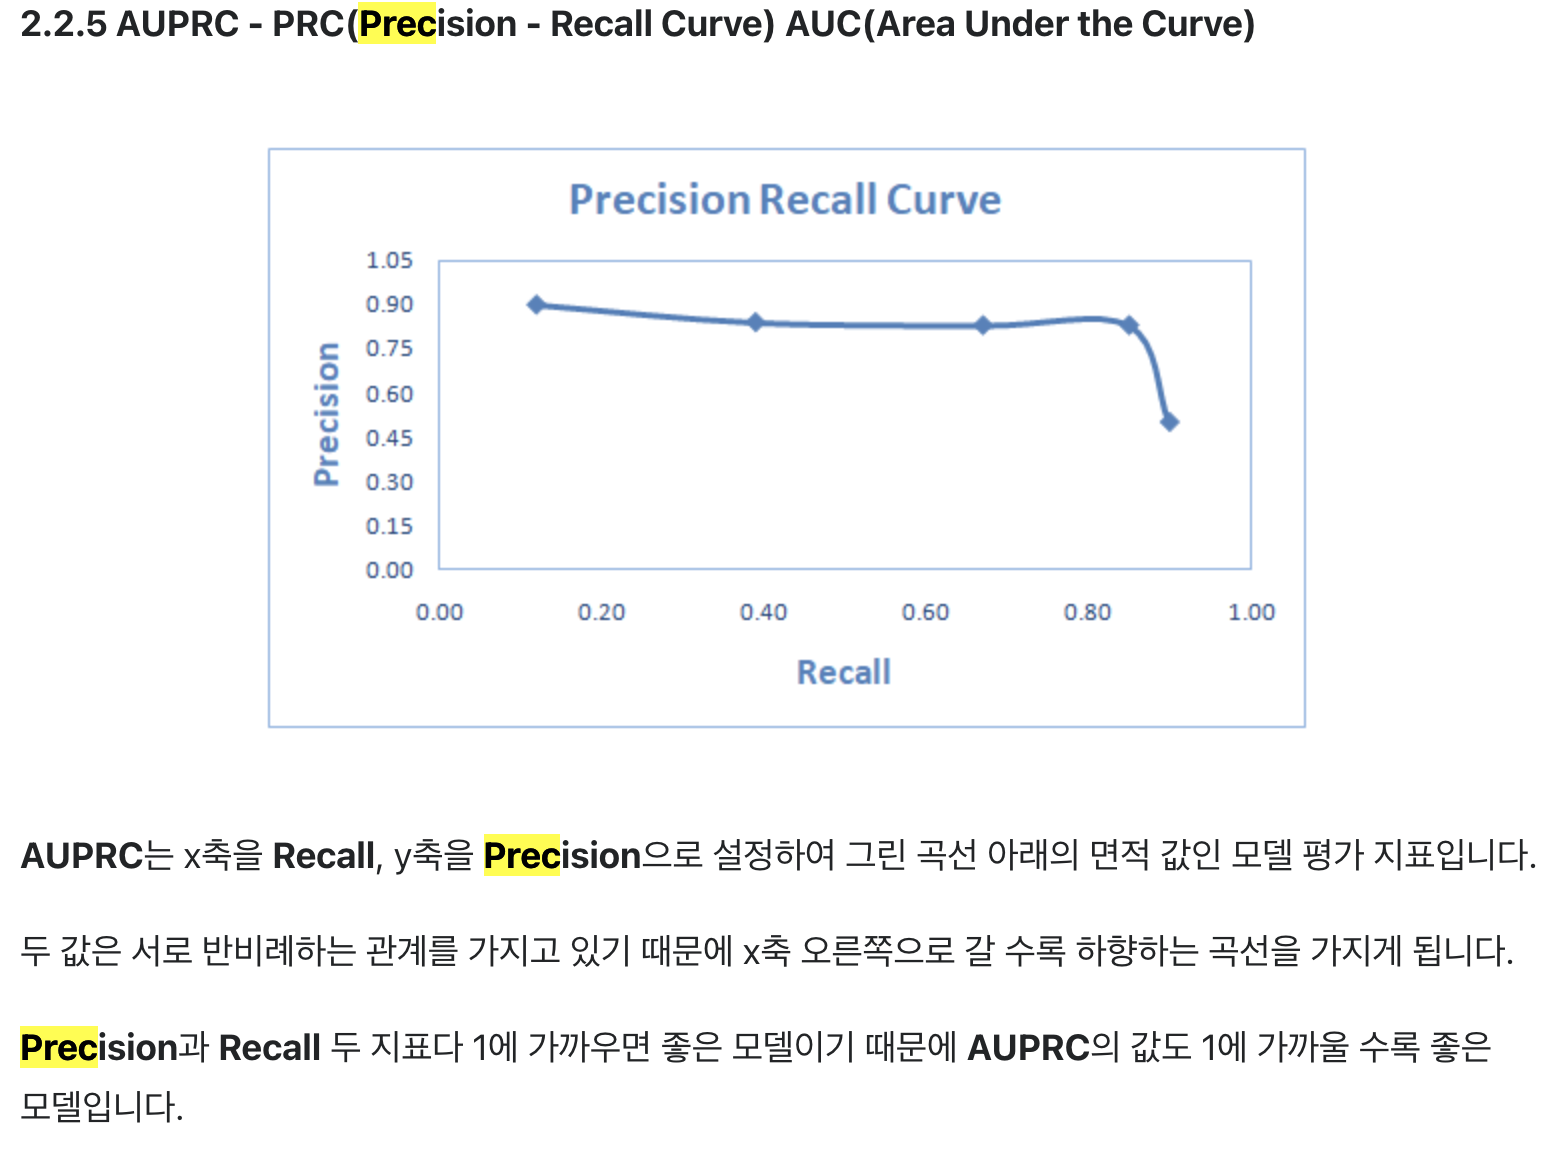

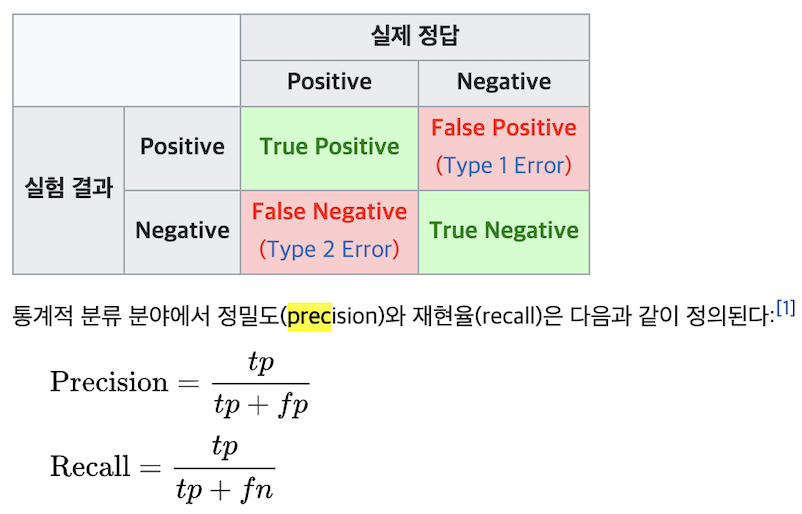

## code start

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
dataset[dataset['Time'].isnull()==True]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [5]:
dataset[dataset['Time'].isna()==True]

# null의 별칭이 na라고 함. na사용하는게 좋다함. 이분은 왜 둘다 함?

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [6]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
dataset.info()

#처음부터 info 때려서 null이 있는지 확인하면 됐던것 아닌가??

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
y = dataset['Class']

In [10]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [11]:
dataset.drop(columns='Class',inplace=True)

In [12]:
dataset.shape

(284807, 30)

In [13]:
X_train = dataset[:142400]
X_test = dataset[142400:227840]
X_val = dataset[227840:]

In [14]:
X_train.shape

(142400, 30)

In [15]:
Y_train = y[:142400]
Y_test = y[142400:227840]
Y_val = y[227840:]

In [16]:
Y_train.shape

(142400,)

In [17]:
from sklearn.preprocessing import StandardScaler

X_train['Amount'] = StandardScaler().fit_transform(X_train['Amount'].values.reshape (-1,1))
X_test['Amount'] = StandardScaler().fit_transform(X_test['Amount'].values.reshape (-1,1))
X_val['Amount'] = StandardScaler().fit_transform(X_val['Amount'].values.reshape (-1,1))

<ipython-input-17-d0dcbc8023f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Amount'] = StandardScaler().fit_transform(X_train['Amount'].values.reshape (-1,1))
<ipython-input-17-d0dcbc8023f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Amount'] = StandardScaler().fit_transform(X_test['Amount'].values.reshape (-1,1))
<ipython-input-17-d0dcbc8023f8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

fit()이란 정규화 즉, 통계에서 정규분포를 만들게 하기 위해서 𝑥 값에서 평균을 빼고 
그 값을 다시 표준편차로 나누어주는 작업을 하는데 이 작업을 하기 위해 평균 𝜇과
표준편차 𝜎를 계산하는 작업이 fit() 이고, transform()은 정규화 작업을 해주는 것입니다. 
(𝑥-𝜇)/𝜎 ==> 새로운 𝑥′ 생기는 것이죠

트레이닝 데이터에 대해서 fit 작업과 transform 작업을 적용해주는 것이
fit_transform이고 여기서 계산된 평균 𝜇과  표준편차 𝜎를 동일하게
테스트 데이터에 적용해서 정규화 작업을 해주는 경우는 transform()만 적용합니다.
테스트 세트에도 트레이닝 데이터에 적용되었던 동일한 평균과 표준편차를 적용하기 위해서
이전에 fit_transform()에서 계산된 값들이 저장된 상태에서 transform()에 적용되는 것입니다.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2

In [19]:
network = Sequential()

In [20]:
network.add(layers.Dense(10,activation='relu',kernel_regularizer=l2(0.001),input_shape=(X_train.shape[1],)))
network.add(layers.Dense(8,activation='relu',kernel_regularizer=l2(0.001)))
network.add(layers.Dense(1,activation='sigmoid'))

In [21]:
network.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

tf.keras.Model.compile에는 세 개의 중요한 매개변수가 있습니다.

-    optimizer : tf.keras.optimizers.Adam(SGD)와 같은 tf.keras.optimizers 아래의 옵티마이저 객체를 전달합니다. 'adam', 'sgd'처럼 문자열로 지정할 수도 있습니다.

-    loss : mse, categorical_crossentropy, binary_crossentropy 등이 자주 사용됩니다. 손실 함수를 커스터마이즈할 수 있으며, tf.keras.losses 모듈 아래의 객체를 전달합니다.

-    metrics : tf.keras.metrics 모듈을 사용합니다.

- 더하여서 훈련과 평가를 즉시 실행하려면 run_eagerly=True 매개변수를 전달할 수 있습니다.

In [22]:
network_history = network.fit(X_train, Y_train, epochs=50, batch_size=500, validation_data=(X_val, Y_val))

Epoch 1/50
285/285 [==============================] - 1s 4ms/step - loss: 3.7942 - accuracy: 0.9947 - val_loss: 0.7268 - val_accuracy: 0.9987
Epoch 2/50
285/285 [==============================] - 0s 962us/step - loss: 0.1848 - accuracy: 0.9972 - val_loss: 0.0492 - val_accuracy: 0.9987
Epoch 3/50
285/285 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 0.9978 - val_loss: 0.0471 - val_accuracy: 0.9987
Epoch 4/50
285/285 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 0.9983 - val_loss: 0.0483 - val_accuracy: 0.9987
Epoch 5/50
285/285 [==============================] - 0s 1ms/step - loss: 0.0288 - accuracy: 0.9986 - val_loss: 0.0764 - val_accuracy: 0.9987
Epoch 6/50
285/285 [==============================] - 0s 941us/step - loss: 0.0296 - accuracy: 0.9983 - val_loss: 0.0358 - val_accuracy: 0.9987
Epoch 7/50
285/285 [==============================] - 0s 967us/step - loss: 0.0238 - accuracy: 0.9985 - val_loss: 0.2445 - val_accuracy: 0.9987


In [23]:
train_loss = network_history.history['loss']

In [24]:
val_loss = network_history.history['val_loss']

In [25]:
epochs=range(1,51)

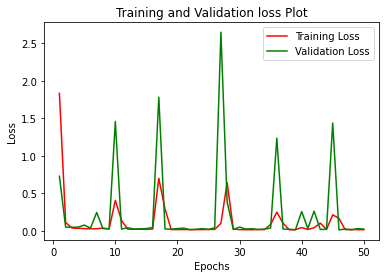

In [26]:
plt.plot(epochs,train_loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Validation Loss')
plt.title('Training and Validation loss Plot')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

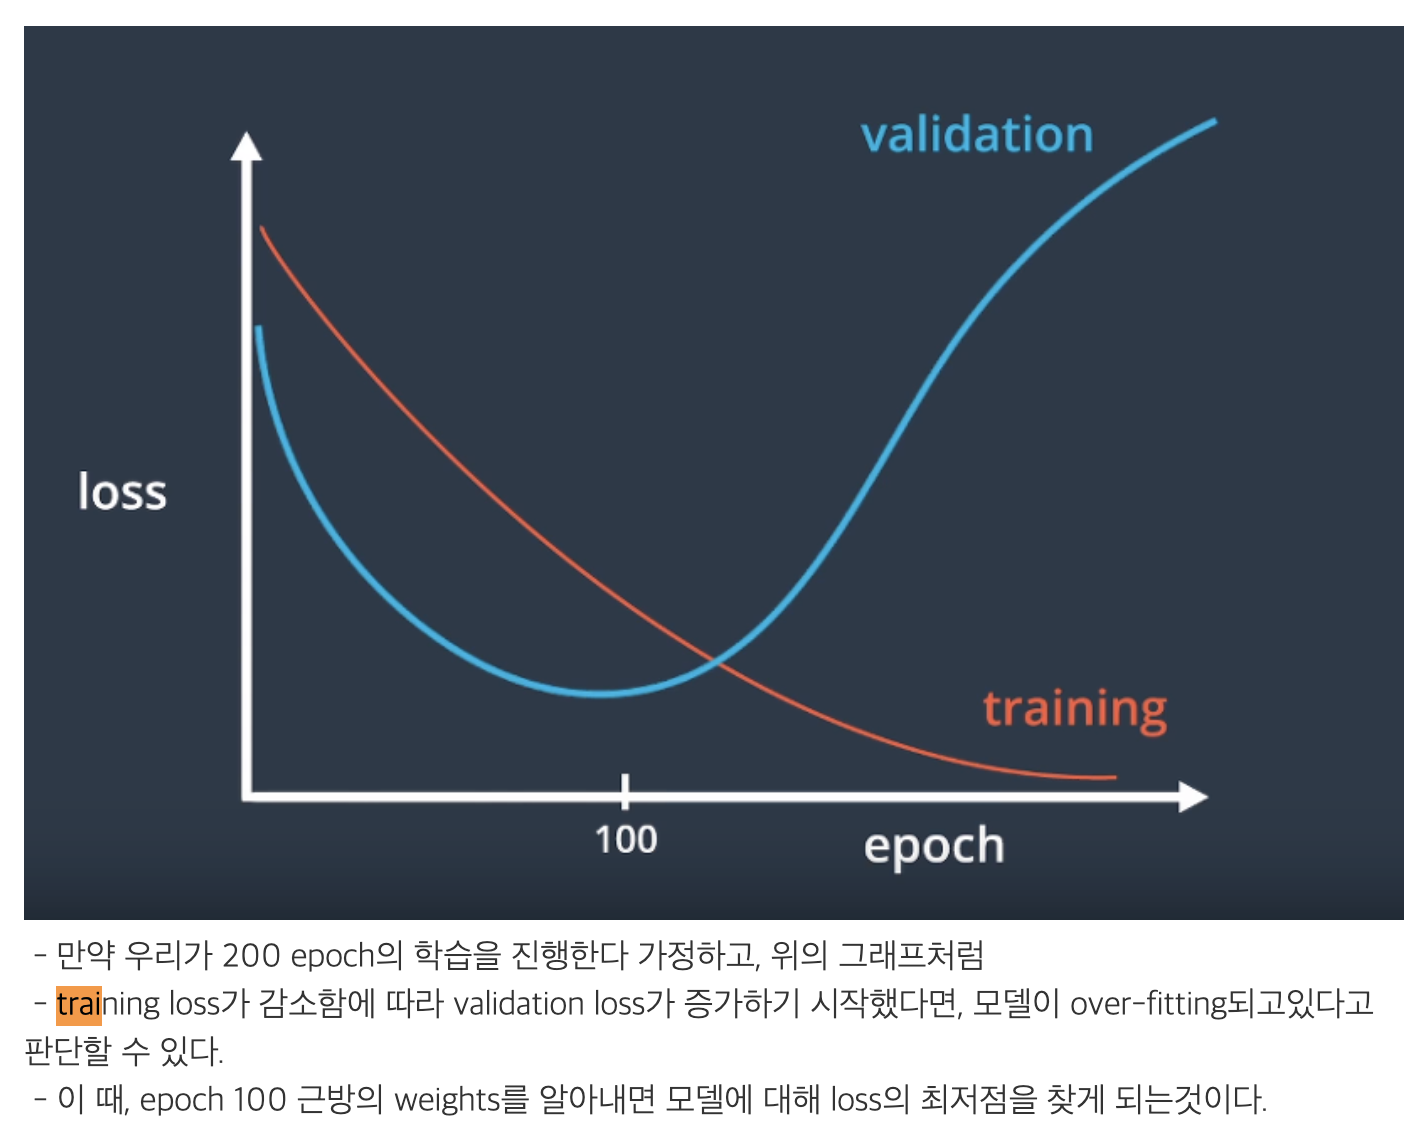

In [27]:
network.predict(X_test)

array([[2.1631568e-05],
       [2.2093245e-05],
       [1.9660336e-05],
       ...,
       [1.5422731e-07],
       [1.6075322e-07],
       [1.4510439e-07]], dtype=float32)

In [28]:
network.evaluate(X_test, Y_test)

2670/2670 [==============================] - 2s 738us/step - loss: 0.0210 - accuracy: 0.9983


[0.0210117120295763, 0.9982677698135376]